<a href="https://colab.research.google.com/github/Dharil33/Transfer-Learnig-For-Feature-Extraction/blob/main/Transfer_Learning_For_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-11-06 06:45:14--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  30.1MB/s    in 2.2s    

2022-11-06 06:45:17 (30.1 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile
localzip = '/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(localzip,'r')
zip_ref.extractall('/content')
zip_ref.close()

In [13]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [4]:
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

58889256/58889256 [==============================] - 2s 0us/step


In [5]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [6]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [8]:
conv_base.trainable = False

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [16]:
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/cats_and_dogs_filtered/train',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/cats_and_dogs_filtered/validation',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit_generator(train_generator,epochs=10,validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
63/63 [==============================] - 500s 8s/step - loss: 0.5035 - accuracy: 0.7940 - val_loss: 0.3232 - val_accuracy: 0.8600
Epoch 2/10
63/63 [==============================] - 495s 8s/step - loss: 0.2631 - accuracy: 0.8960 - val_loss: 0.2582 - val_accuracy: 0.8940
Epoch 3/10
63/63 [==============================] - 493s 8s/step - loss: 0.2131 - accuracy: 0.9085 - val_loss: 0.2507 - val_accuracy: 0.8840
Epoch 4/10
63/63 [==============================] - 492s 8s/step - loss: 0.1915 - accuracy: 0.9270 - val_loss: 0.2625 - val_accuracy: 0.8910
Epoch 5/10
63/63 [==============================] - 495s 8s/step - loss: 0.1714 - accuracy: 0.9305 - val_loss: 0.2539 - val_accuracy: 0.8930
Epoch 6/10
63/63 [==============================] - 495s 8s/step - loss: 0.2026 - accuracy: 0.9150 - val_loss: 0.3309 - val_accuracy: 0.8650
Epoch 7/10
63/63 [==============================] - 494s 8s/step - loss: 0.1523 - accuracy: 0.9380 - val_loss: 0.3119 - val_accuracy: 0.8750
Epoch 8/10
63

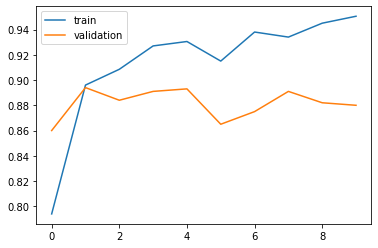

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

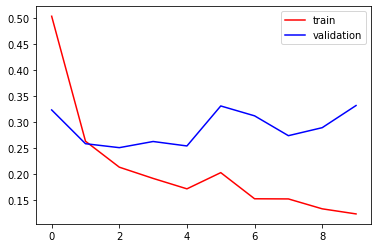

In [22]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()